In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Exercise 1


In [61]:
tmp_df = []

with open("Data_EX1.txt", 'r') as f:
    lines = f.readlines()
    for line in lines[1:]:
        tmp_df.append(line[5:-1].split("  "))

df = pd.DataFrame(tmp_df)
del tmp_df
df.drop([31,32,33,34,35,36], axis='index', inplace=True)

for i in range(12):
    df[i] = pd.to_numeric(df[i], errors='coerce')
    df[i] = df[i].replace(99.0, np.nan)
    df[i] = df[i].replace(-99.0, np.nan)

In [108]:
time_range = range(df.shape[1])
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov","Dec"]

# mean of each month
month_mean = [np.nanmean(df[x].to_numpy()) for x in range(12)]
# text position
text_y = [x - 1.5 if x < 20.5 else x + 0.5 for x in month_mean]
text_y[1] -= 0.7
# range of each month
month_min = [np.nanmin(df[x]) for x in range(12)]
month_max = [np.nanmax(df[x]) for x in range(12)]

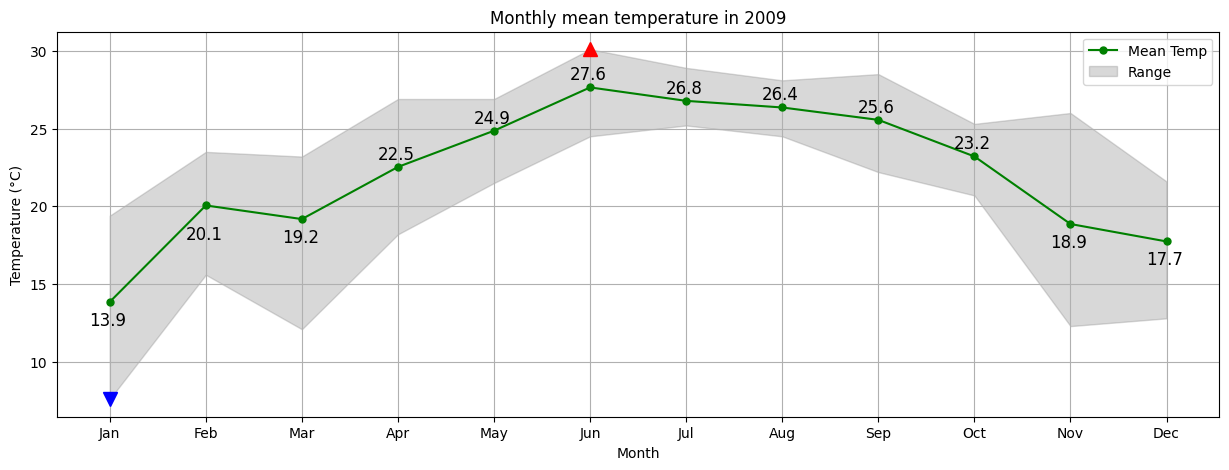

In [113]:
# plot
plt.figure(figsize=(15,5))


#middle line
plt.plot(time_range,month_mean, marker='.', markersize=10, linestyle='solid', color="green", label="Mean Temp")
# plt.scatter(time_range, month_mean, color='green', label='dots', zorder=3)
# Add text labels next to the points
for i in range(len(time_range)):
    plt.text(time_range[i] - 0.21, text_y[i], str(np.round(month_mean[i],1)), fontsize=12)
# range
plt.plot(time_range,month_min, linestyle='solid', alpha=0)
plt.plot(time_range,month_max, linestyle='solid', alpha=0)
plt.fill_between(time_range, month_max, month_min, color='gray', alpha=0.3, label='Range')
# min max
plt.plot(time_range[5], month_max[5], marker='^', markersize=10, color='red')
plt.plot(time_range[0], month_min[0], marker='v', markersize=10, color='blue')
# other 
plt.legend()
plt.xticks(time_range, months)
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Monthly mean temperature in 2009")
plt.grid()

#### Exercise 2

Text(0.5, 1.0, 'Daily Temperature Heatmap in 2009')

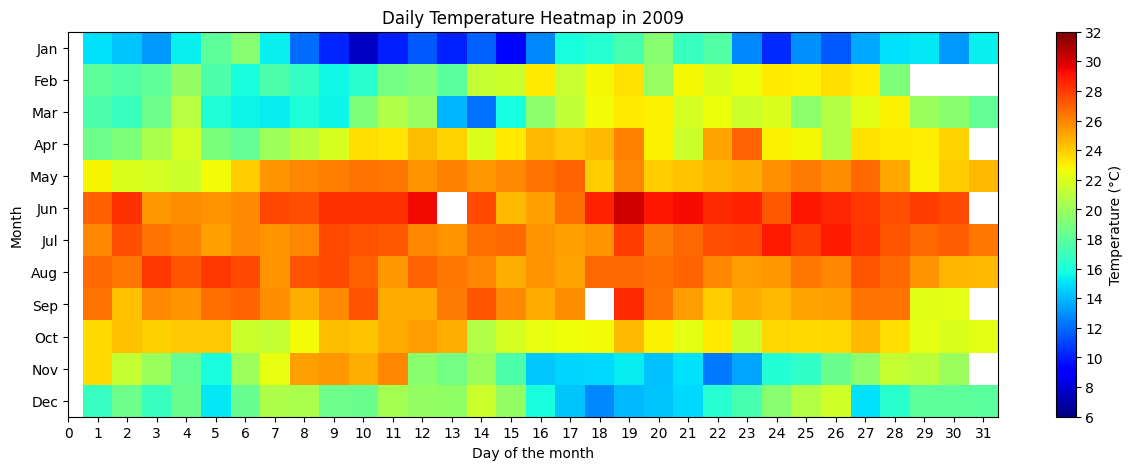

In [130]:
x_axis = np.arange(1,32,1)
y_axis = np.arange(1,13,1)
data = df.T[::-1]
x_axis, y_axis = np.meshgrid(x_axis, y_axis)

plt.figure(figsize=(15,5))
cm = plt.pcolormesh(x_axis, y_axis, data, cmap = 'jet', vmin=6, vmax=32)      #this is the pcolormesh

plt.xticks(range(32),range(32))
plt.yticks(range(12,0,-1), months)

cbar = plt.colorbar(cm)
cbar.set_label('Temperature (°C)')
cbar.set_ticks(range(6,33,2))  # Positions of ticks
cbar.set_ticklabels(range(6,33,2))

plt.ylabel("Month")
plt.xlabel("Day of the month")
plt.title("Daily Temperature Heatmap in 2009")

#### Exercise 3


<Figure size 1500x500 with 0 Axes>

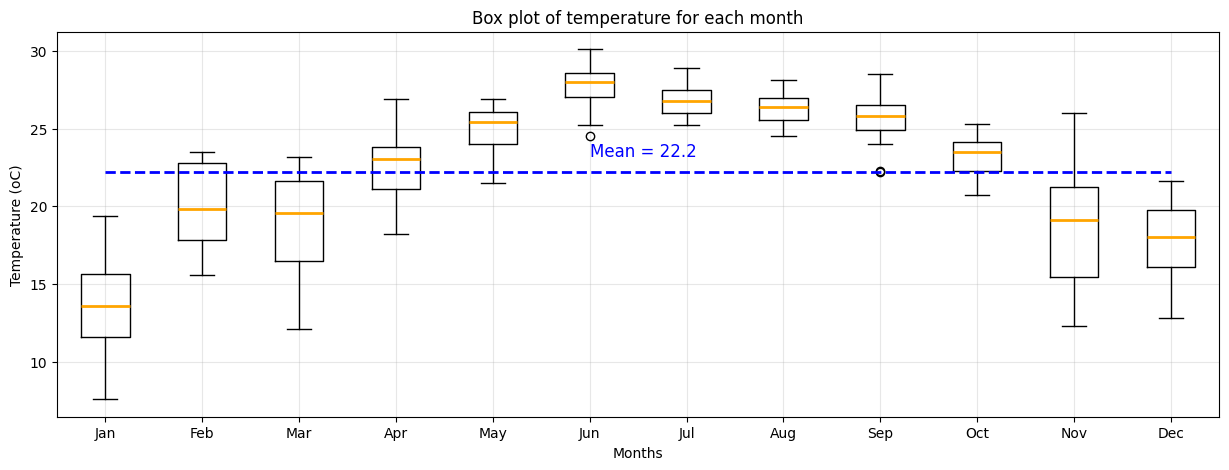

In [165]:
plt.figure(figsize=(15,5))
box = df.plot(kind='box', figsize=(15,5), color='black', medianprops=dict(color='orange', linewidth=2))
plt.hlines(y=np.mean(month_mean), xmin=1, xmax=12, color='blue', linestyle='--', linewidth=2)
plt.text(6, np.mean(month_mean) + 1, f"Mean = {np.round(np.mean(month_mean),1)}", fontsize=12, color='blue')
plt.xticks(list(range(1,13)), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Box plot of temperature for each month")
plt.ylabel("Temperature (oC)")
plt.xlabel("Months")
plt.grid(alpha=0.3,zorder=0)
plt.show()

#### Exercise 4


In [176]:
import xarray as xr
from numpy import *
from netCDF4 import *
from datetime import *
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import BoundaryNorm

In [178]:
netcdf_file = 'wrfout_d02_2019-11-12_sample.nc'
xr_data = xr.open_dataset(netcdf_file)
lon = xr_data.coords["XLONG"].values
lat = xr_data.coords["XLAT"].values
data = xr_data.data_vars["T2"].values

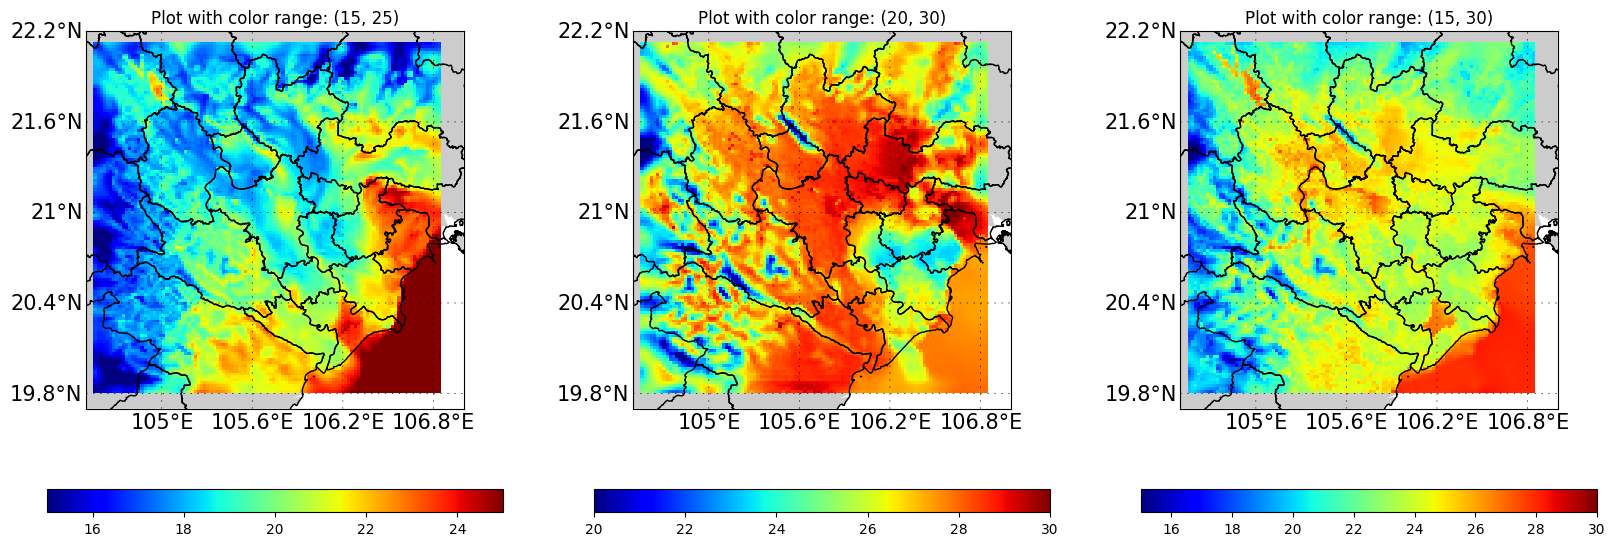

In [181]:
#now, create a map
fig = plt.figure(figsize=(20,7))
#basemap setting
lon_min = 104.5
lon_max = 107
lat_min = 19.7
lat_max = 22.2

vrange = [(15,25), (20,30), (15,30)]

for i in range(3):
    ax = plt.subplot(1,3, i+1)
    map2 = Basemap(projection='merc',
                  llcrnrlon=lon_min, #lower left corner longtitude
                  llcrnrlat=lat_min, #lower left corner lattitude
                  urcrnrlon=lon_max, #upper right corner longtitude
                  urcrnrlat=lat_max, #upper right corner lattitude
                  resolution='i',epsg=4326)

   #some decorations
    map2.fillcontinents(zorder=0)

   #draw the lat and lon
    parallels = arange(-90.,150, around((lat_max-lat_min)/4, decimals=1)) 	#lat
    meridians = arange(0.,180., around((lat_max-lat_min)/4, decimals=1))
    map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
    map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)

   #add vietnam
    map2.readshapefile(r'gadm41_VNM_0/gadm41_VNM_1', "gadm41_VNM_1", linewidth=1,color='k')

   #now plot the data
    hour = i*6 

    cm = plt.pcolormesh( lon , lat , data[hour,:,:]-273.15,vmin = vrange[i][0],vmax = vrange[i][1],cmap='jet')

    fig.colorbar(cm, orientation= 'horizontal')
    plt.title(f"Plot with color range: {vrange[i]}")

plt.show()

#### Exercise 5

In [166]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import *
from netCDF4 import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import scipy.stats as stats

<frozen importlib._bootstrap>:488: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 96 from PyObject
<frozen importlib._bootstrap>:488: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


In [168]:
data=xr.open_dataset("sst.nc")

def calculate_nino34(data):    
    sst_nino34=data.sst.sel(lat=slice(-5,5),lon=slice(190,240))
    tmp=sst_nino34.groupby('time.month')
    tmp1=tmp-tmp.mean(dim="time")
    index_nino34=tmp1.mean(dim=["lat","lon"])

    return index_nino34

index_nino34 = calculate_nino34(data)

##### 5.1

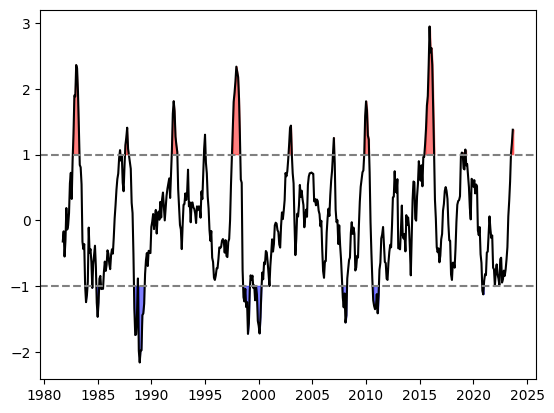

In [175]:
plt.plot(index_nino34, 'k')
# Draw the dashed horizontal line at y=1 and y=-1
plt.axhline(y=1, color='gray', linestyle='--')
plt.axhline(y=-1, color='gray', linestyle='--')
# Fill color
plt.fill_between(np.linspace(0,504,504),index_nino34, 1, where=(index_nino34 > 1), color='red', alpha=0.5)
plt.fill_between(np.linspace(0,504,504),index_nino34, -1, where=(index_nino34 < -1), color='blue', alpha=0.5)

# Year | start at sep 1981 and end at august 2023
x_ticks = np.arange(-21, 520, 5*12)
plt.xticks(x_ticks, [f"{1980 + i}" for i in range(0,46,5)])
plt.show()

##### 5.2


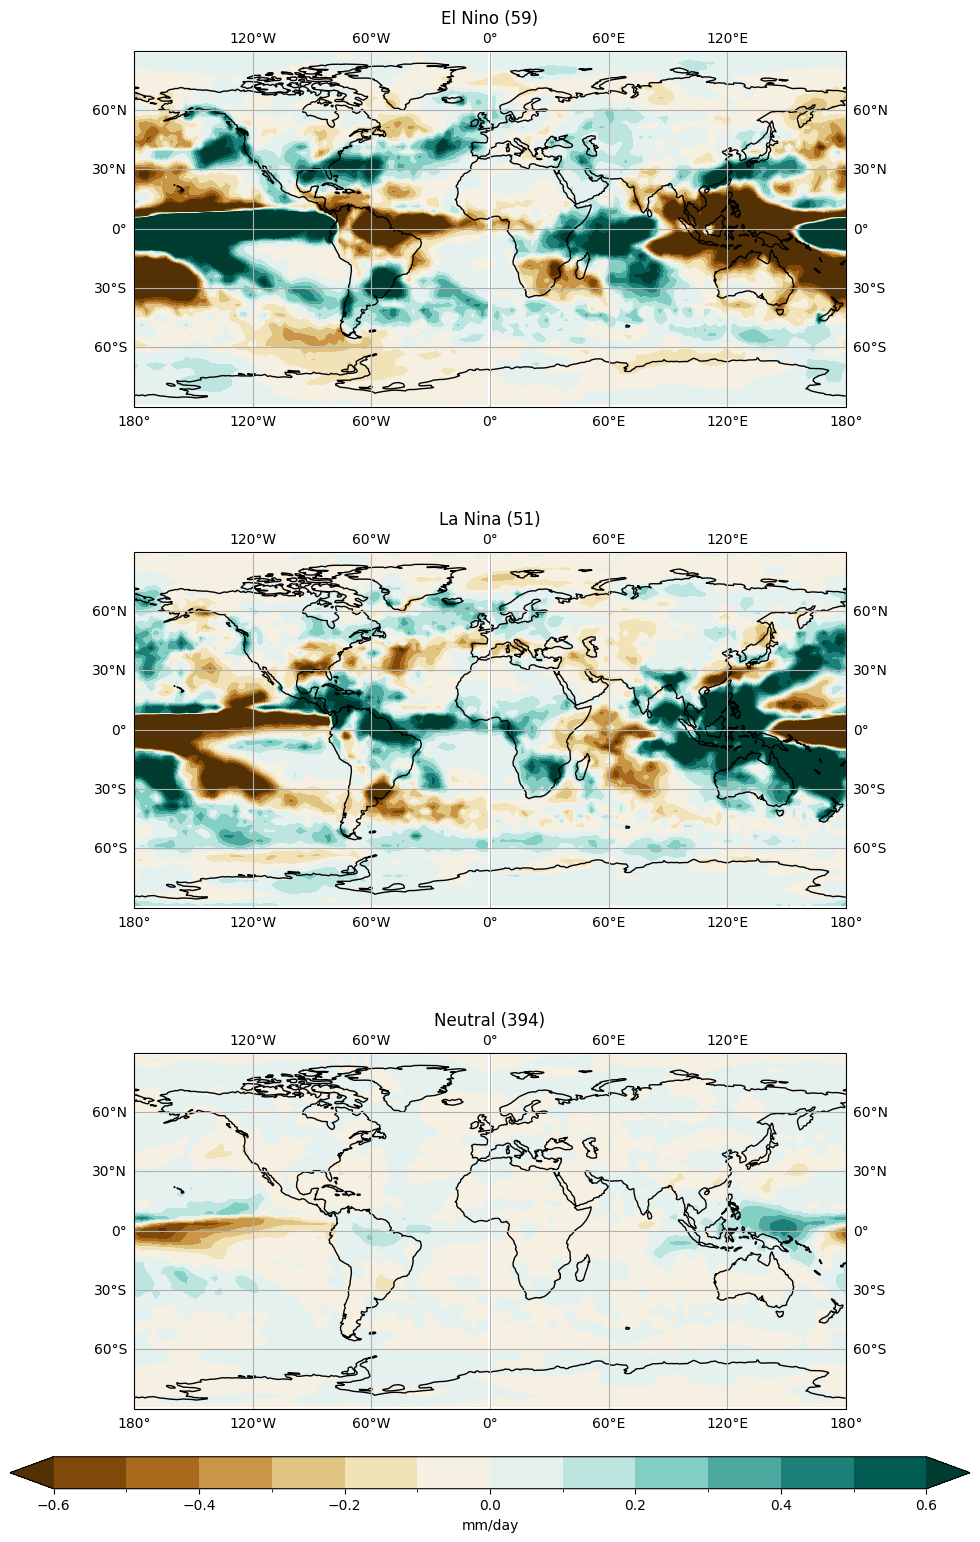

In [174]:
def classify_enso(nino34):
    """Classify months into El Niño, La Niña, or Neutral based on Nino3.4 index."""
    enso_state = xr.full_like(nino34, 'neutral', dtype='object')
    enso_state = xr.where(nino34 >= 1.0, 'elnino', enso_state)
    enso_state = xr.where(nino34 <= -1.0, 'lanina', enso_state)
    return enso_state

def calculate_enso_composites(precip_anomaly, enso_state):
    """Calculate precipitation anomaly composites for each ENSO phase."""
    elnino_comp = precip_anomaly.where(enso_state == 'elnino').mean('time')
    lanina_comp = precip_anomaly.where(enso_state == 'lanina').mean('time')
    neutral_comp = precip_anomaly.where(enso_state == 'neutral').mean('time')

    n_elnino = (enso_state == 'elnino').sum().values
    n_lanina = (enso_state == 'lanina').sum().values
    n_neutral = (enso_state == 'neutral').sum().values

    return elnino_comp, lanina_comp, neutral_comp, n_elnino, n_lanina, n_neutral

def plot_enso_composites(elnino_comp, lanina_comp, neutral_comp, n_elnino, n_lanina, n_neutral):
    """Create three-panel plot of ENSO precipitation anomaly composites."""
    fig = plt.figure(figsize=(12, 16))
    projection = ccrs.PlateCarree()

    vmin, vmax = -0.6, 0.6
    titles = [f'El Nino ({n_elnino})', f'La Nina ({n_lanina})', f'Neutral ({n_neutral})']
    composites = [elnino_comp, lanina_comp, neutral_comp]

    for idx, (title, data) in enumerate(zip(titles, composites)):
        ax = plt.subplot(3, 1, idx + 1, projection=projection)

        im = data.plot.contourf(
            ax=ax,
            transform=ccrs.PlateCarree(),
            levels=np.linspace(vmin, vmax, 13),
            cmap='BrBG',
            add_colorbar=False,
            extend='both'
        )

        ax.coastlines()
        ax.gridlines(draw_labels=True)
        
        ax.set_title(title)
        ax.set_ylim(-90, 90)
        ax.set_xlim(-180, 180)

    # Adjust colorbar position
    cbar_ax = fig.add_axes([0.1, 0.05, 0.8, 0.02])
    cbar = plt.colorbar(im, cax=cbar_ax, orientation='horizontal')
    cbar.set_label('mm/day', fontsize=10)

    # Adjust spacing
    plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.1, hspace=0.4)
    
    return plt

# Main execution
try:
    precip_ds = xr.open_dataset('precip.mon.mean.nc')
    sst_ds = xr.open_dataset('sst.nc')

    climatology_sst = sst_ds['sst'].sel(time=slice('1981', '2024')).groupby('time.month').mean('time')
    anomalies_sst = sst_ds['sst'].groupby('time.month') - climatology_sst

    nino34 = index_nino34  # Using function from previous example

    precip = precip_ds['precip']
    if 'units' in precip.attrs and precip.attrs['units'] == 'mm/s':
        precip = precip * 86400

    climatology_precip = precip.sel(time=slice('1981', '2024')).groupby('time.month').mean('time')
    anomalies_precip = precip.groupby('time.month') - climatology_precip

    enso_state = classify_enso(nino34)

    elnino_comp, lanina_comp, neutral_comp, n_elnino, n_lanina, n_neutral = calculate_enso_composites(
        anomalies_precip, enso_state)

    plot_enso_composites(elnino_comp, lanina_comp, neutral_comp, n_elnino, n_lanina, n_neutral)
    plt.show()
except FileNotFoundError:
    print("Please ensure both 'precip.mon.mean.nc' and 'sst.nc' files are in the current directory")
except Exception as e:
    print(f"An error occurred: {str(e)}")